# Tutorial 1  for JetSeT 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import numpy as np
from matplotlib import pyplot as plt


/var/folders/s7/r9g9gczx6_l06sdj1hh494_r0000gn/T/ipykernel_41050/2399723619.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Basic setup and access to Jet class

In [2]:
import jetset

In [3]:
print(jetset.__version__)

1.2.1.post2


See for more details:

-     https://jetset.readthedocs.io/en/latest/user_guide/jet_model_phys_SSC/Jet_example_phys_SSC.html


In [4]:
from jetset.jet_model import Jet
my_jet=Jet(electron_distribution='lppl')

In [5]:
Jet.available_electron_distributions()


lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
superexp: powerlaw with super-exp cut-off


In [6]:
my_jet.show_pars()


In [7]:
my_jet.parameters.par_table


<Table length=11>
 model name        name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
   str12          str16              str19             object       float64        float64          float64       bool  bool 
------------ ---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
jet_leptonic                R         region_size              cm 5.000000e+15     1.000000e+03     1.000000e+30 False  False
jet_leptonic              R_H     region_position              cm 1.000000e+17     0.000000e+00               -- False   True
jet_leptonic                B      magnetic_field           gauss 1.000000e-01     0.000000e+00               -- False  False
jet_leptonic         beam_obj             beaming lorentz-factor* 1.000000e+01     1.000000e-04               -- False  False
jet_leptonic           z_cosm            redshift                 1.000000e-01     0.000000e+00               -- False  False
jet_leptonic             gmin  low-energy-cut-off lorentz-factor* 2.000000e+00     1.000000e+00     1.000000e+09 False  False
jet_leptonic             gmax high-energy-cut-off lorentz-factor* 1.000000e+06     1.000000e+00     1.000000e+15 False  False
jet_leptonic                N    emitters_density         1 / cm3 1.000000e+02     0.000000e+00               -- False  False
jet_leptonic gamma0_log_parab    turn-over-energy lorentz-factor* 1.000000e+04     1.000000e+00     1.000000e+09 False  False
jet_leptonic                s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
jet_leptonic                r  spectral_curvature                 4.000000e-01    -1.500000e+01     1.500000e+01 False  False

In [8]:
my_jet.show_model()



--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


In [9]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=1E15)
my_jet.set_par('N',val=1E3)

In [10]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

In [11]:
my_jet.show_electron_distribution()


--------------------------------------------------------------------------------
electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False



In [12]:
p=my_jet.electron_distribution.plot()

In [13]:
p=my_jet.electron_distribution.plot(energy_unit='TeV')

In [14]:
p=my_jet.electron_distribution.plot3p()


In [15]:
my_jet.eval()

In [16]:
from jetset.plot_sedfit import PlotSED
my_plot=PlotSED()
my_plot=my_jet.plot_model(plot_obj=my_plot)


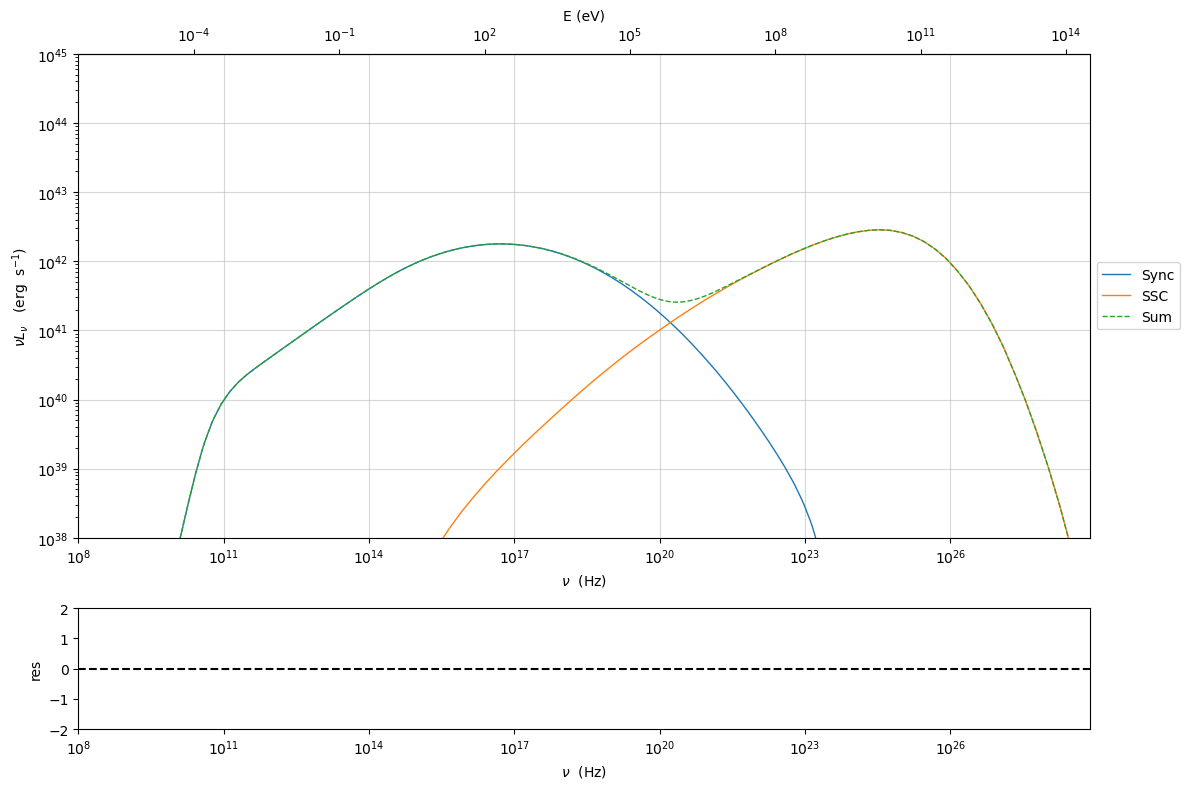

In [17]:
my_plot=my_jet.plot_model(frame='src')
my_plot.setlim(y_max=1E45,y_min=1E38,x_min=1E8)

In [18]:
my_plot=my_jet.plot_model(frame='src',density=True)


In [19]:
my_jet.list_spectral_components()


Sum
Sync
SSC


In [20]:
Sync=my_jet.spectral_components.Sync


In [21]:
Sync=my_jet.get_spectral_component_by_name('Sync')


In [22]:
nu_sync=Sync.SED.nu
nuFnu_sync=Sync.SED.nuFnu

In [23]:
%matplotlib inline
plt.loglog(nu_sync,nuFnu_sync)
plt.xlim(1E8,1E24)
plt.ylim(1E-20,1E-13)

(1e-20, 1e-13)

In [24]:
nu_sync_src=Sync.SED.nu_src
nuLnu_sync_src=Sync.SED.nuLnu_src

In [25]:
my_jet.spectral_components.build_table(restframe='obs')
t_obs=my_jet.spectral_components.table

In [26]:
t_obs[::10]


<Table length=50>
          nu                    Sum                    Sync                   SSC          
          Hz               erg / (cm2 s)          erg / (cm2 s)          erg / (cm2 s)     
       float64                float64                float64                float64        
---------------------- ---------------------- ---------------------- ----------------------
             1000000.0                    0.0                    0.0                    0.0
     3026648.059395689                    0.0                    0.0                    0.0
      9160598.47544371 1.8603797396558676e-27 1.8603797396558676e-27                    0.0
     27725907.59860481 5.1595363417357764e-26 5.1595363417357764e-26                    0.0
     83916564.42830162  1.431379827478216e-24  1.431379827478216e-24                    0.0
    253985906.87807292 3.9735563564626905e-23 3.9735563564626905e-23                    0.0
     768725952.1663721 1.1046717952023323e-21 1.1046717952023323e-21                    0.0
     2326662911.331458  3.080805682170684e-20  3.080805682170684e-20                    0.0
     7041989785.449296  8.644485946297075e-19  8.644485946297075e-19                    0.0
    21313624718.414333  2.306684215598247e-17  2.306684215598247e-17                    0.0
    64508840892.677124  2.359091905962728e-16  2.359091905962728e-16                    0.0
     195245558101.6861  6.902359289265072e-16  6.902359288111225e-16 1.1529357079717737e-25
     590939589534.0952 1.2706022677703694e-15 1.2706022666677407e-15 1.1016851174478868e-24
    1788566161883.4656  2.208916014971156e-15 2.2089160049523058e-15 1.0010412976130365e-23
     5413360302965.376  3.826931882389815e-15  3.826931793320606e-15  8.899729137354083e-23
    16384336455779.848  6.589881921189085e-15  6.589881155681668e-15  7.649317386296128e-22
     49589620138372.22 1.1180666370188857e-14   1.11806601655594e-14  6.200421858857617e-21
    150090327557973.34  1.837899377156817e-14  1.837894803000712e-14 4.5714433282292674e-20
     454270598637404.3 2.8481401611503506e-14 2.8481110055016016e-14 2.9141902056652975e-19
    1374917225806420.5  4.045302787040985e-14  4.045158153886338e-14 1.4458735574140537e-18
    4161390553316715.5 5.2374189653396946e-14  5.236907908233256e-14  5.109615155907832e-18
1.2595064642583616e+16  6.171362704824416e-14  6.169963765197736e-14 1.3987938680787413e-17
 3.812082795843888e+16  6.589153989434509e-14    6.5858169017587e-14  3.336826043424404e-17
1.1537832996296573e+17  6.394730467557568e-14   6.38739810863085e-14   7.33190285983697e-17
  3.49209598478725e+17  5.641173882229106e-14 5.6258550182075554e-14  1.531832904446868e-16
1.0569345535579873e+18  4.512009292045399e-14 4.4809044098446214e-14 3.1104809938576163e-16
 3.198968915434551e+18  3.297019912130442e-14 3.2356606042668766e-14  6.135600201492622e-16
 9.682153059967095e+18 2.2351306666052067e-14 2.1185520795077525e-14 1.1656567506888628e-15
2.9304469769721385e+19  1.465531518804629e-14 1.2532988840929134e-14 2.1220070641598253e-15
 8.869431656014668e+19  1.042137729071224e-14  6.708995289164071e-15  3.711776955027923e-15
2.6844648109619652e+20  9.562341850311042e-15  3.252776047271246e-15  6.308834788527645e-15
 8.124930210614097e+20 1.1765160404935578e-14 1.4243104469902499e-15 1.0340338842087164e-14
 2.459130425468051e+21 1.6880945559503778e-14  5.633620144457924e-16 1.6317309372096944e-14
 7.442922330043758e+21 2.5043518032595348e-14   2.01365729306227e-16 2.4842030506003874e-14
2.2527106426459734e+22 3.6804206182568015e-14  6.405993059340064e-17  3.674010062563712e-14
 6.818162294944493e+22 5.2589955812687434e-14 1.6024510749410583e-17 5.2573913075021694e-14
2.0636177678638565e+23  7.143652494689343e-14 1.6118903718466766e-18  7.143490551574714e-14
 6.245844712439592e+23  9.051567306004849e-14  5.560882236772484e-21  9.051566738923308e-14
1.8903973778192233e+24 1.0378620211569088e-13 2.5509632278581066e-28 1.0378620211569045e-13
  5.72156755506324e+24 1.0

In [27]:
my_jet.spectral_components.build_table(restframe='src')
t_src=my_jet.spectral_components.table

In [28]:
t_obs['Sync'][::10].to('GeV/cm2 s')

<Quantity [0.00000000e+00, 0.00000000e+00, 1.16115770e-24, 3.22032929e-23,
           8.93397018e-22, 2.48009881e-20, 6.89481903e-19, 1.92288766e-17,
           5.39546375e-16, 1.43971905e-14, 1.47242935e-13, 4.30811381e-13,
           7.93047558e-13, 1.37869693e-12, 2.38858295e-12, 4.11308030e-12,
           6.97841919e-12, 1.14712371e-11, 1.77765107e-11, 2.52478913e-11,
           3.26862082e-11, 3.85098848e-11, 4.11054360e-11, 3.98670033e-11,
           3.51138251e-11, 2.79676055e-11, 2.01954050e-11, 1.32229620e-11,
           7.82247636e-12, 4.18742550e-12, 2.03022312e-12, 8.88984658e-13,
           3.51622913e-13, 1.25682603e-13, 3.99830638e-14, 1.00017129e-14,
           1.00606284e-15, 3.47082969e-18, 1.59218601e-25, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00] GeV / (cm2 s)>

In [29]:
t_src.write('test_SED.txt',format='ascii.ecsv',overwrite=True)


In [30]:
my_jet.energetic_report()


In [31]:
my_jet.energetic_report_table


<Table length=37>
       name                    type               units       val     
      str17                   str29               object    float64   
----------------- ----------------------------- --------- ------------
BulkLorentzFactor                                         1.000000e+01
              U_e Energy dens. blob rest. frame erg / cm3 4.950261e-01
         U_p_cold Energy dens. blob rest. frame erg / cm3 1.503276e-01
              U_B Energy dens. blob rest. frame erg / cm3 1.591549e-03
              U_p Energy dens. blob rest. frame erg / cm3 0.000000e+00
       U_p_target Energy dens. blob rest. frame erg / cm3 0.000000e+00
          U_Synch Energy dens. blob rest. frame erg / cm3 1.316122e-02
      U_Synch_DRF Energy dens. disk rest. frame erg / cm3 1.316122e+02
           U_Disk Energy dens. blob rest. frame erg / cm3 0.000000e+00
            U_BLR Energy dens. blob rest. frame erg / cm3 0.000000e+00
             U_DT Energy dens. blob rest. frame erg / cm3 0.000000e+00
            U_CMB Energy dens. blob rest. frame erg / cm3 0.000000e+00
       U_Disk_DRF Energy dens. disk rest. frame erg / cm3 0.000000e+00
        U_BLR_DRF Energy dens. disk rest. frame erg / cm3 0.000000e+00
         U_DT_DRF Energy dens. disk rest. frame erg / cm3 0.000000e+00
        U_CMB_DRF Energy dens. disk rest. frame erg / cm3 0.000000e+00
        L_Sync_rf         Lum. blob rest. frme.   erg / s 1.652654e+39
         L_SSC_rf         Lum. blob rest. frme.   erg / s 2.158648e+39
     L_EC_Disk_rf         Lum. blob rest. frme.   erg / s 0.000000e+00
      L_EC_BLR_rf         Lum. blob rest. frme.   erg / s 0.000000e+00
       L_EC_DT_rf         Lum. blob rest. frme.   erg / s 0.000000e+00
      L_EC_CMB_rf         Lum. blob rest. frme.   erg / s 0.000000e+00
    L_pp_gamma_rf         Lum. blob rest. frme.   erg / s 0.000000e+00
       jet_L_Sync                      jet Lum.   erg / s 4.131634e+40
        jet_L_SSC                      jet Lum.   erg / s 5.396619e+40
    jet_L_EC_Disk                      jet Lum.   erg / s 0.000000e+00
     jet_L_EC_BLR                      jet Lum.   erg / s 0.000000e+00
      jet_L_EC_DT                      jet Lum.   erg / s 0.000000e+00
     jet_L_EC_CMB                      jet Lum.   erg / s 0.000000e+00
   jet_L_pp_gamma                      jet Lum.   erg / s 0.000000e+00
        jet_L_rad                      jet Lum.   erg / s 9.528254e+40
        jet_L_kin                      jet Lum.   erg / s 6.047641e+42
        jet_L_tot                      jet Lum.   erg / s 6.157838e+42
          jet_L_e                      jet Lum.   erg / s 4.638913e+42
          jet_L_B                      jet Lum.   erg / s 1.491449e+40
     jet_L_p_cold                      jet Lum.   erg / s 1.408728e+42
          jet_L_p                      jet Lum.   erg / s 0.000000e+00

In [32]:
my_jet.save_model('test_model.pkl')


In [33]:
my_jet_new=Jet.load_model('test_model.pkl')


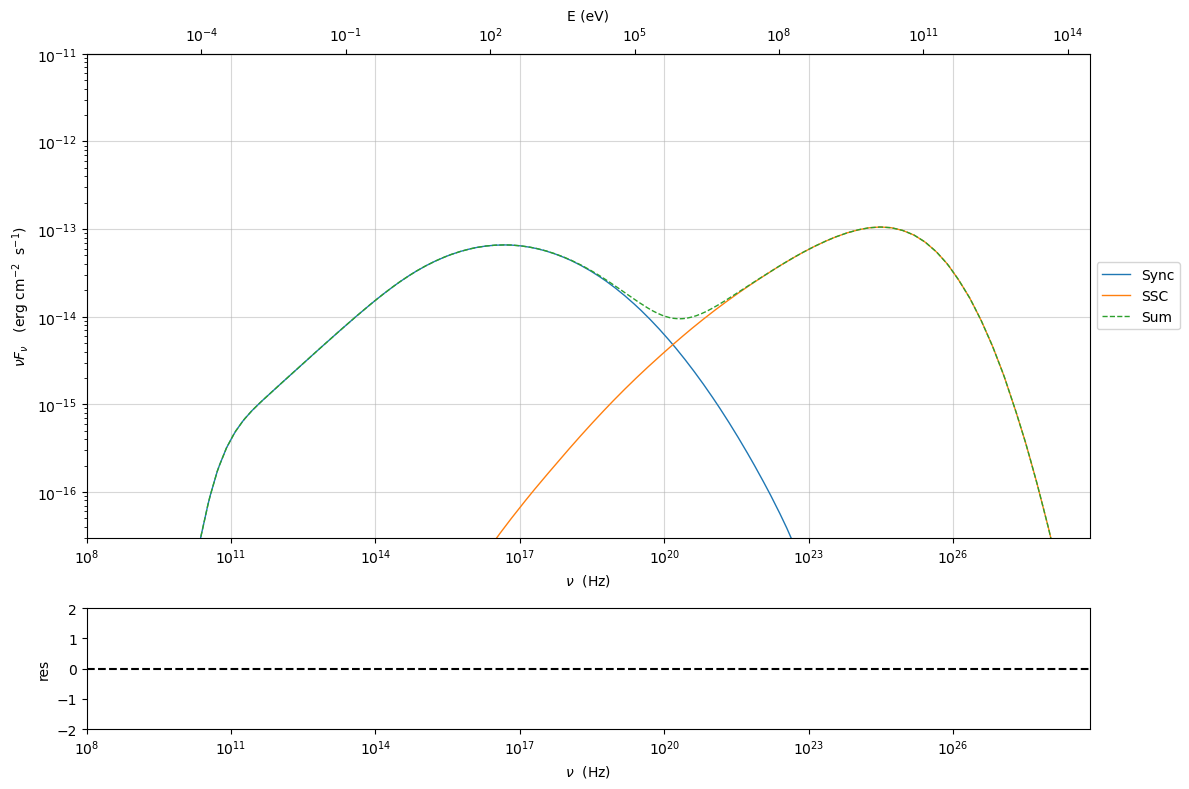

In [34]:
my_plot=my_jet_new.plot_model()
my_plot.setlim(y_max=1E-11,y_min=3E-17,x_min=1E8)

## Define custom emiotters distribution

See for more details:

-     https://jetset.readthedocs.io/en/latest/user_guide/custom_emitters_distr/custom_emitters.html

In [35]:
from jetset.jet_emitters import EmittersDistribution


In [36]:
def distr_func_super_exp(gamma,gamma_cut,s,a):
    return np.power(gamma,-s)*np.exp(-(1/a)*(gamma/gamma_cut)**a)

In [37]:
n_e_super_exp=EmittersDistribution('super_exp',spectral_type='plc',normalize=False)
n_e_super_exp.add_par('gamma_cut',par_type='turn-over-energy',val=50000.,vmin=1., vmax=None, unit='lorentz-factor')
n_e_super_exp.add_par('s',par_type='LE_spectral_slope',val=2.3,vmin=-10., vmax=10, unit='')
n_e_super_exp.add_par('a',par_type='spectral_curvature',val=1.8,vmin=0., vmax=100., unit='')

In [38]:
n_e_super_exp.set_distr_func(distr_func_super_exp)


In [39]:
n_e_super_exp.parameters.show_pars()


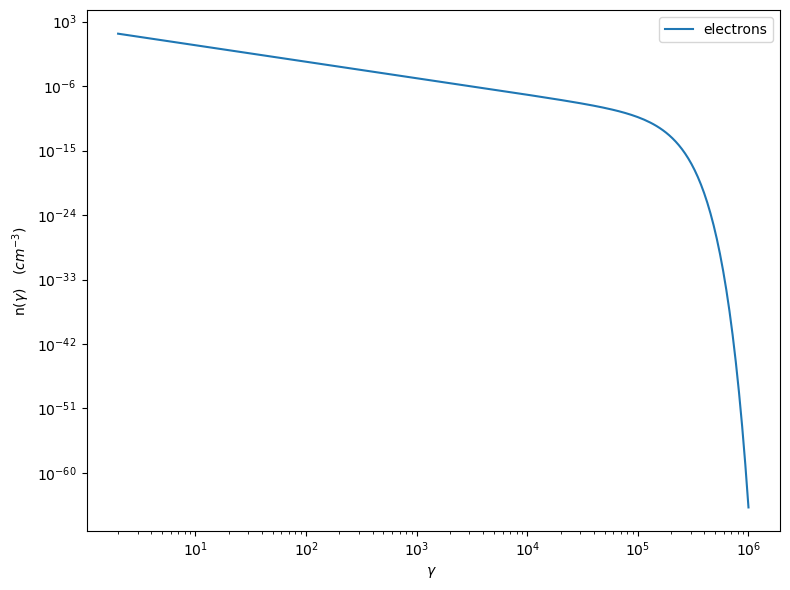

In [40]:
p=n_e_super_exp.plot()


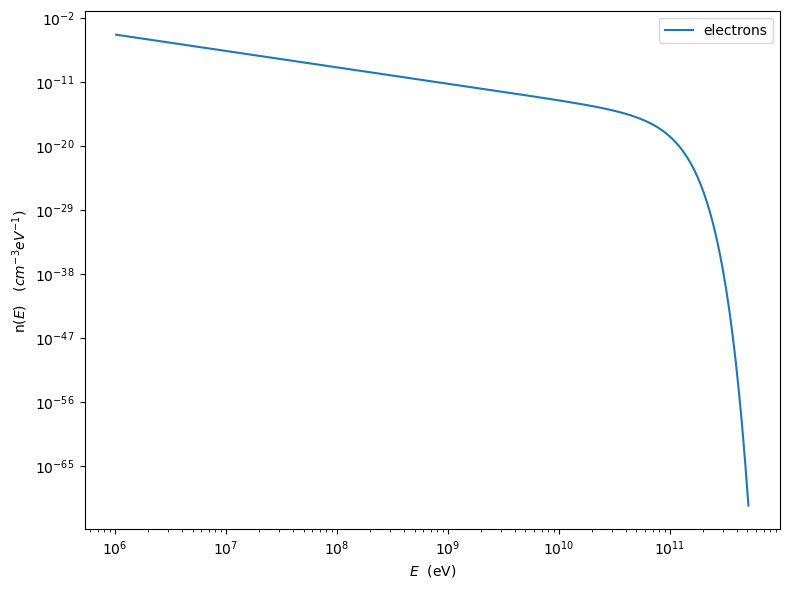

In [41]:
p=n_e_super_exp.plot(energy_unit='eV')


In [42]:
from jetset.jet_model import Jet
my_jet=Jet(electron_distribution=n_e_super_exp)

In [43]:
n_e_super_exp.normalize

False

In [44]:
my_jet.electron_distribution.normalize

False

In [45]:
my_jet.parameters.N.val=5E4
my_jet.show_model()
my_jet.IC_nu_size=100
my_jet.eval()


--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: super_exp  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  False
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


In [46]:
my_jet.eval()


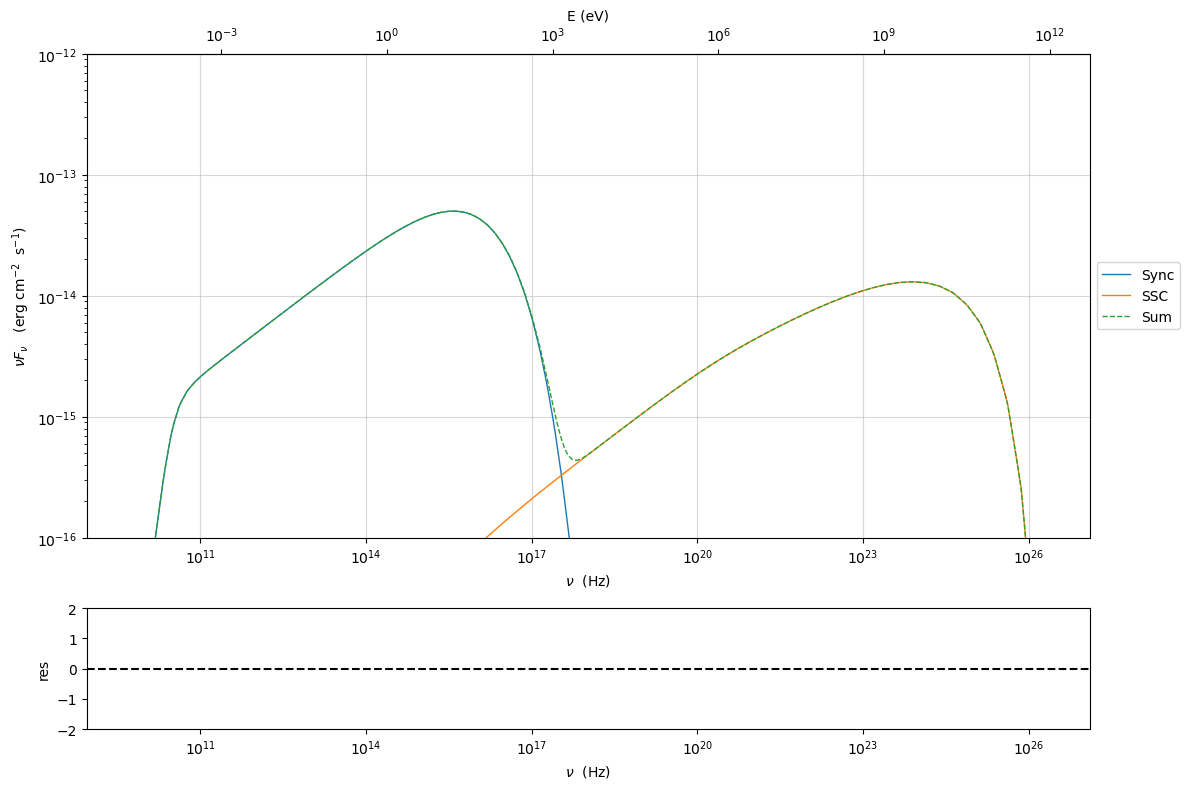

In [47]:
p=my_jet.plot_model()
p.setlim(y_min=1E-16,y_max=1E-12)

In [48]:
my_jet.electron_distribution.normalize=True

In [49]:

my_jet.parameters.N.val=5E4
my_jet.show_model()
my_jet.IC_nu_size=100
my_jet.eval()



--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: super_exp  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


In [50]:
my_jet.plot_model(p,comp='Sum',label='Normalized distr')
p.setlim(y_min=1E-16,y_max=1E-12)

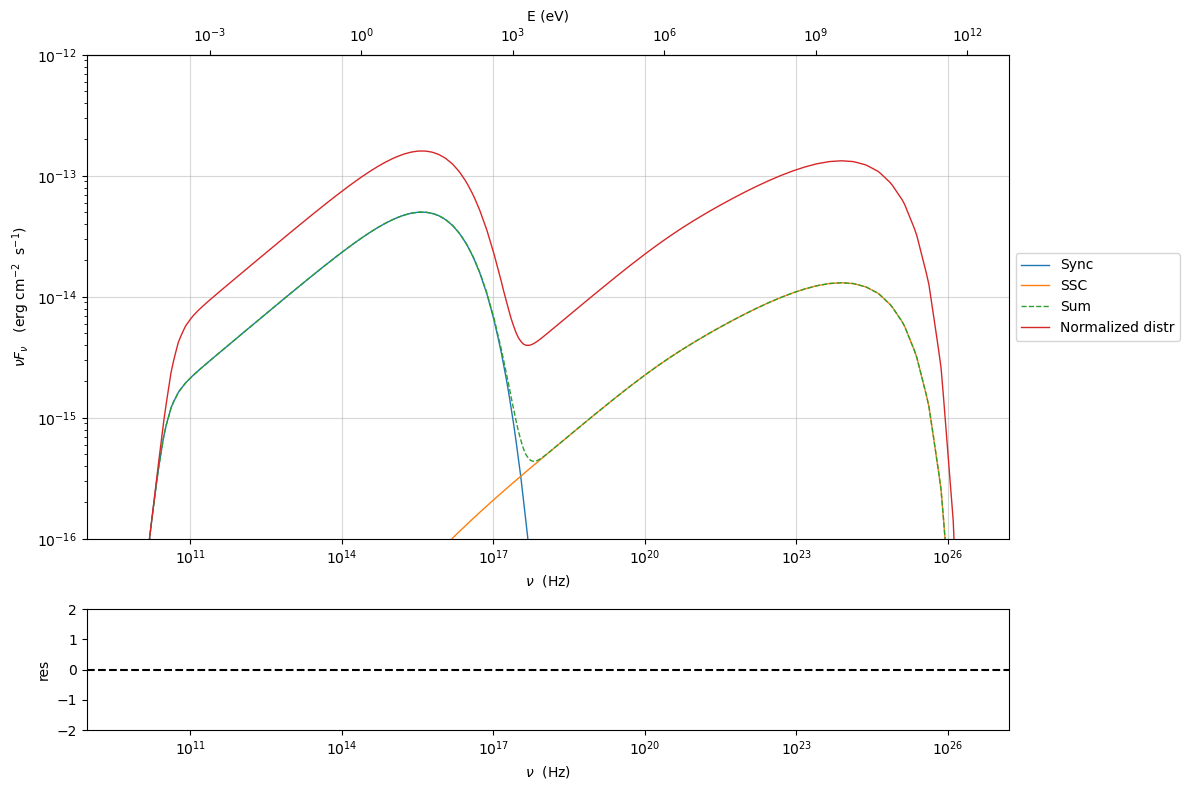

In [51]:
p.fig